# Games and Argumentation Demo for AI^3

This demo aims to reproduce the graphs generated in the paper **Games, Queries, and Argumentation Frameworks: Time for a Family Reunion!** which will be presented on [7th Workshop on Advances in Argumentation in Artificial Intelligence 2023](https://sites.google.com/view/ai32023)

## Import Package

In [1]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)
from lib.GameArg import *
from IPython.display import Image

## Section1: Figure 1

In this section, we will reproduce the figure 1 in the paper

### 1.1 Facts

the following graph has to be a **win_move** graph, if you input a argumentation graph, please source node and target node first

In [2]:
%%file files/plain_wm_graph.dlv
edge(a,c).
edge(a,b).
edge(c,d).
edge(c,e).
edge(d,f).
edge(d,g).
edge(d,e).
edge(e,d).
edge(e,m).
edge(e,h).
edge(g,d).
edge(k,l).
edge(l,e).
edge(l,m).
edge(m,e).
edge(m,n).
edge(n,m).

Writing files/plain_wm_graph.dlv


### 1.2 Plain Graph Generation

**Win-Move Graph**

In [3]:
# create_plain_graph(input_file, pred_name, output_filename, arg=False)
create_plain_graph("files/plain_wm_graph.dlv", "edge", "graphs/wm_graph.dot")

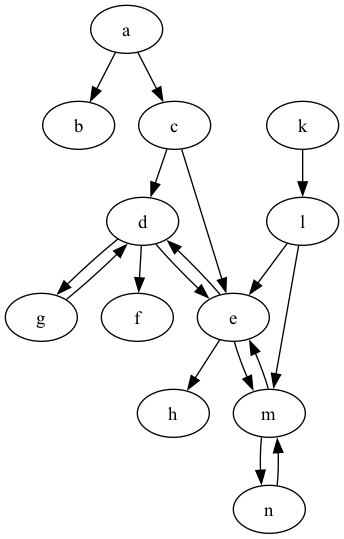

In [4]:
render_dot_to_png("graphs/wm_graph.dot", "graphs/wm_graph.png")
Image("graphs/wm_graph.png")

**Attack_Graph**

In [5]:
# based on the facts, we also simply reverse the edge direction (arg=True) to generate the attack graph
create_plain_graph(
    "files/plain_wm_graph.dlv", "edge", "graphs/attack_graph.dot", arg=True
)

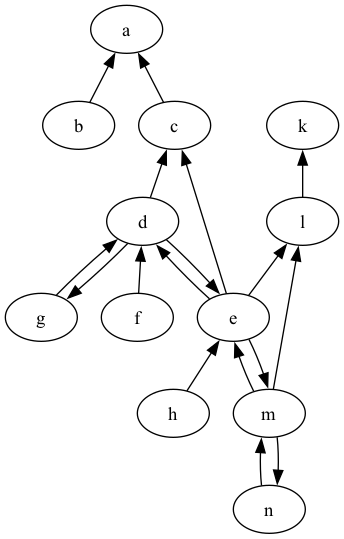

In [6]:
render_dot_to_png("graphs/attack_graph.dot", "graphs/attack_graph.png")
Image("graphs/attack_graph.png")

### 1.3 Graph Coloring : Well-Founded Semantics

**WM game**

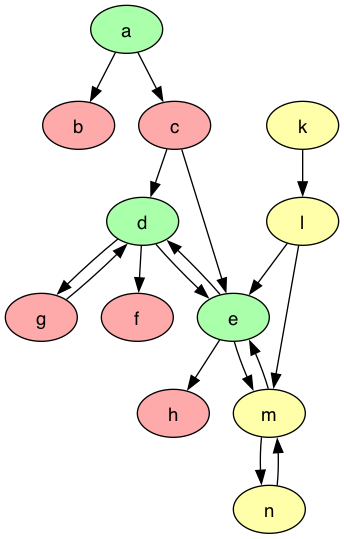

In [7]:
game_node_color_wfs = {"win": "green", "lost": "red", "drawn": "yellow"}
visualize_wfs("files/plain_wm_graph.dlv", "game", game_node_color_wfs)
Image("graphs/game_node_colored.png")

**Argumentation**

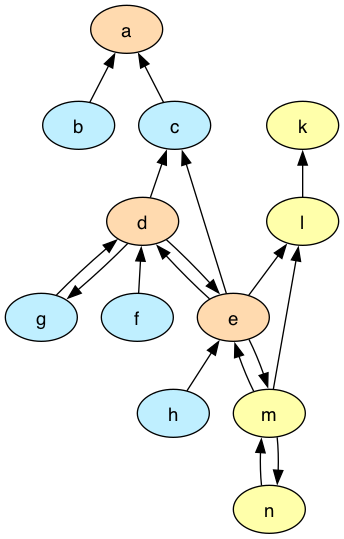

In [8]:
arg_node_color_wfs = {
    "accepted": "blue",
    "defeated": "orange",
    "undefined": "yellow",
}
visualize_wfs(
    "files/plain_wm_graph.dlv",
    "arg",
    arg_node_color_wfs,
    arg=True,
)
Image("graphs/arg_node_colored.png")

### 1.4 Graph Coloring: Stable Models

Similar to the WFS, we also want to generate all the stable models with defined visualization schema

**Stable Models for WM Graph**

In [9]:
game_node_color_stb = {"win": "green", "lost": "red"}
visualize_stb("files/plain_wm_graph.dlv", "game", game_node_color_stb)

**Stable Models for Attack Graph**

In [10]:
arg_node_color_stb = {"accepted": "blue", "defeated": "orange"}
visualize_stb(
    "files/plain_wm_graph.dlv",
    "arg",
    arg_node_color_stb,
    arg=True,
)

## Section 2: Figure 3

We will generate the graph for figure 3

In [11]:
%%file files/plain_wm_graph_p.dlv
edge("a","r1").
edge("r1","¬c").
edge("r1","¬d").
edge("r1","b").
edge("a","r2").
edge("r2","¬b").
edge("b","r3").
edge("r3","¬a").
edge("c","r4").
edge("r4","¬d").
edge("¬a","a").
edge("¬c","c").
edge("¬b","b").
edge("¬d","d").

Writing files/plain_wm_graph_p.dlv


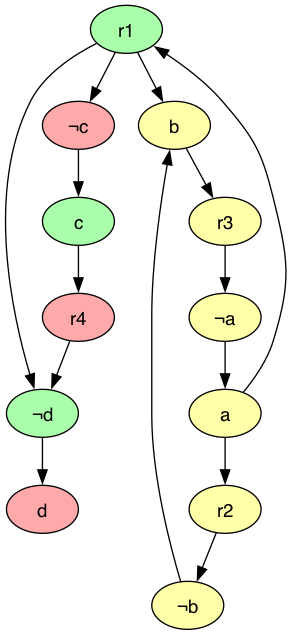

In [12]:
game_node_color_wfs = {"win": "green", "lost": "red", "drawn": "yellow"}
visualize_wfs("files/plain_wm_graph_p.dlv", "game_p", game_node_color_wfs)
Image("graphs/game_p_node_colored.png")

### Section 3: Figure 4

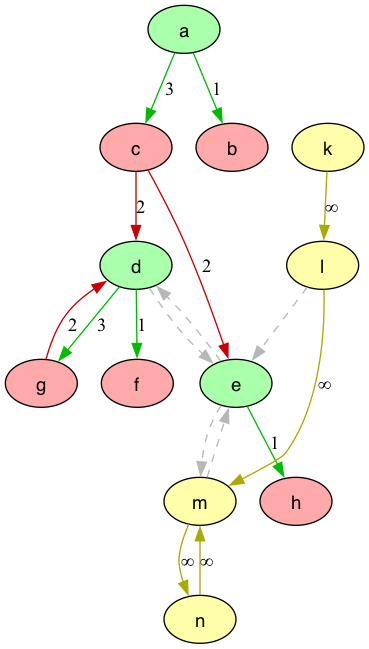

In [13]:
game_node_color_wfs = {"win": "green", "lost": "red", "drawn": "yellow"}

game_edge_color_wfs = {
    ("green", "green"): "gray",
    ("green", "yellow"): "gray",
    ("yellow", "green"): "gray",
    ("yellow", "yellow"): "yellow",
    ("green", "red"): "green",
    ("red", "green"): "red",
}
visualize_wfs(
    "files/plain_wm_graph.dlv",
    "game",
    game_node_color_wfs,
    game_edge_color_wfs,
    show_label=True,
)
Image("graphs/game_graph_colored.png")

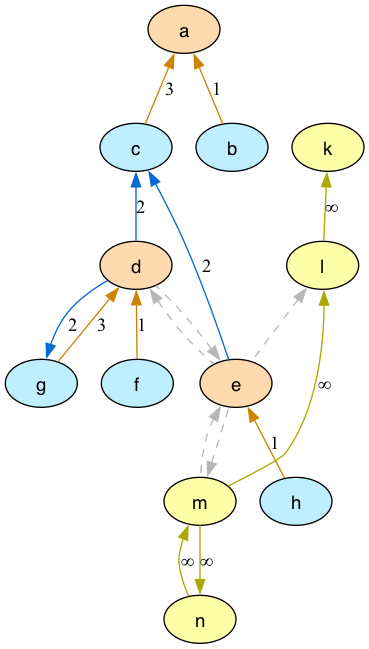

In [14]:
arg_node_color_wfs = {
    "accepted": "blue",
    "defeated": "orange",
    "undefined": "yellow",
}
arg_edge_color_wfs = {
    ("blue", "blue"): "gray",
    ("blue", "yellow"): "gray",
    ("yellow", "blue"): "gray",
    ("yellow", "yellow"): "yellow",
    ("blue", "orange"): "orange",
    ("orange", "blue"): "blue",
}
visualize_wfs(
    "files/plain_wm_graph.dlv",
    "arg",
    arg_node_color_wfs,
    arg_edge_color_wfs,
    arg=True,
    show_label=True,
)
Image("graphs/arg_graph_colored.png")